# Bank Campaign Effectiveness Analysis

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

The data represents the outcomes of 17 direct marketing campaigns carried out by a Portuguese bank. These campaigns involved direct marketing using phone calls, conducted between May 2008 and November 2010, with each record corresponding to a client contact attempt and its result.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [17]:
import pandas as pd

In [18]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [19]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



#### Check for null values

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

**Observation** There are no missing or NaN values in the dataset

#### Examine Target Variable (y)

In [21]:
print(df['y'].value_counts())

y
no     36548
yes     4640
Name: count, dtype: int64


**Observation** The target variable falls into binary classification with values 'yes' and 'no'. So it requires appropriate numeric mapping (like 0-no, 1-yes)

#### Plot Target Variable Distribution

Plot a countplot to visualize distribution of overall subscription outcome

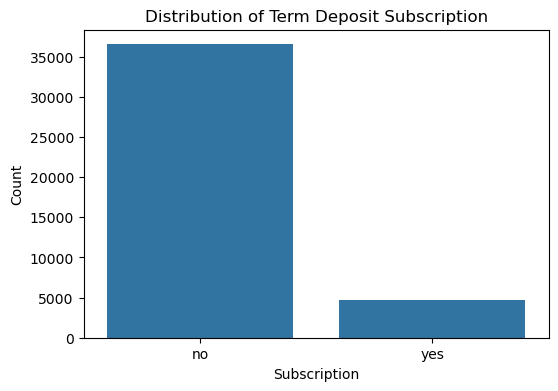

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x='y', data=df)
plt.title('Distribution of Term Deposit Subscription')
plt.xlabel('Subscription')
plt.ylabel('Count')
plt.show()

#### Month vs Subscription Outcome

Plot a countplot to visualize effectiveness of campaigns by month

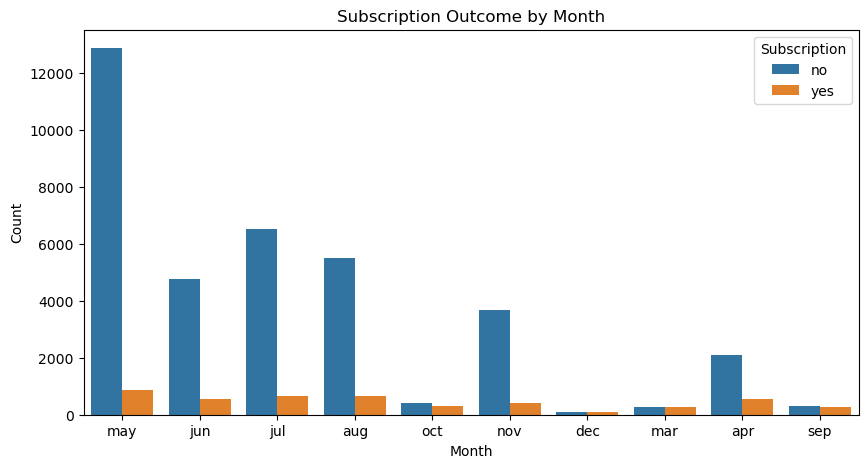

In [23]:
plt.figure(figsize=(10,5))
sns.countplot(x='month', hue='y', data=df)
plt.title('Subscription Outcome by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Subscription')
plt.show()

**Observation** It seems March, September, October seems to be months with high success rate while months May, June, July, August have low success.

#### Days since last contact, number of contacts vs Subscription outcome

Plot boxplots related to number of contacts made and days since last contact to visualize the effect of multiple contacts made to the customers.

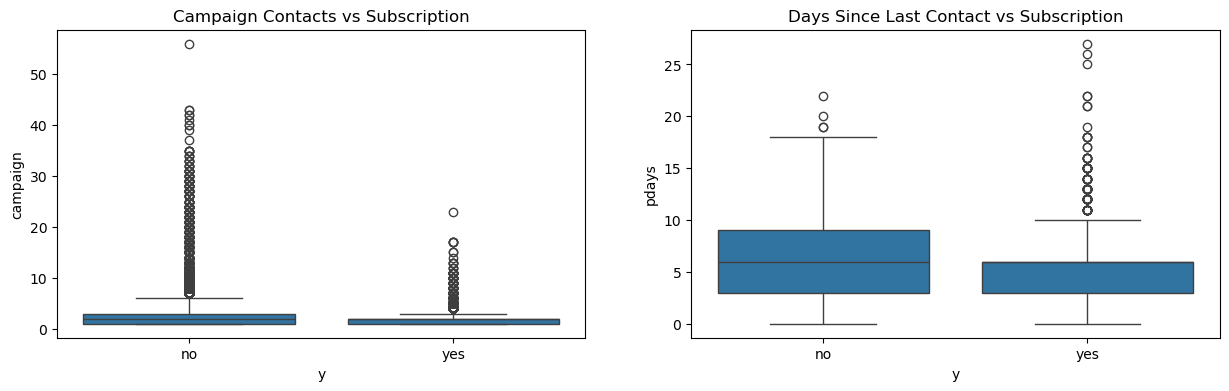

In [68]:
# Most of the values under pdays columns are 999 which probably indicates that the customer was never contacted before. 
# Just for the plot, filter the data to exclude '999' to show the effect of contacting a customer second time
pdays_filtered = df[df['pdays'] < 999]

fig, axes = plt.subplots(1, 2, figsize=(15,4))

sns.boxplot(x='y', y='campaign', data=df, ax=axes[0])
axes[0].set_title('Campaign Contacts vs Subscription')

sns.boxplot(x='y', y='pdays', data=pdays_filtered, ax=axes[1])
axes[1].set_title('Days Since Last Contact vs Subscription')

plt.show()

**Observation** Number of contacts made is an important feature that more number of contacts does not achieve success when all other features hold same.

#### Euribor Rate, Employment Variance Rate vs Subscription outcome

Plot boxplots related to economic activity related features (Euribor Rate and Employment Variance Rate) to visualize the likelyhood of subscriptions during high economic activity

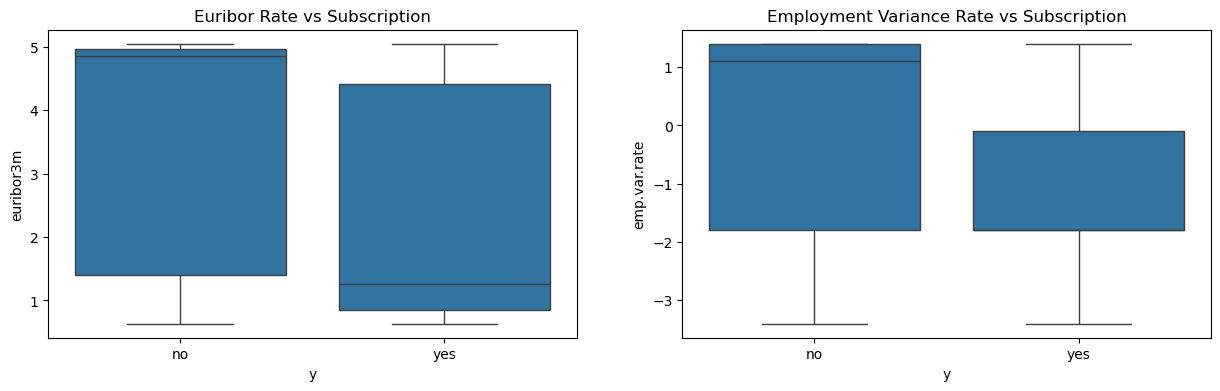

In [66]:
fig, axes = plt.subplots(1, 2, figsize=(15,4))

sns.boxplot(x='y', y='euribor3m', data=df, ax=axes[0])
axes[0].set_title('Euribor Rate vs Subscription')

sns.boxplot(x='y', y='emp.var.rate', data=df, ax=axes[1])
axes[1].set_title('Employment Variance Rate vs Subscription')

plt.show()

**Observation** The features 'Euribor Rate' and 'Employment Variance Rate' have significant impact on term-deposit decisions made by customers. During high interest rate and positive employment periods, customers tend not to make term deposits, possibly due to alternate investment opportunities.

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

The business objective of this task is to help a bank institution improve the effectiveness of its direct marketing via phone by predicting whether a customer will subscribe to a long-term deposit. By using historical marketing data and customer attributes, the goal is to identify main characterstics that effect the success rate, helping bank instiution in a better management of available resources and selection of a high quality and
affordable set of potential buying customers.

This task can be framed as a supervised classification task, where the output variable (y) indicates whether a client subscribed to a term deposit (yes or no). Multiple classification algorithms (k-nearest neighbors, logistic regression, decision trees, and support vector machines) will be trained and compared to determine which model best predicts campaign success.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

#### Load the data

In [25]:
data_clean = df.copy()

#### Remove duration
The duration is not known before a call is performed. Also, after the end of the call y is obviously known. Hence, the duration is removed from the dataset to prepare a realistic predictive model.

In [26]:
data_clean = data_clean.drop(columns=['duration'])

#### Encode Output Variable (y) 

In [27]:
y = data_clean['y'].map({'no': 0, 'yes': 1})
y.shape

(41188,)

In [28]:
data_model = data_clean.copy()

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

#### Split train and test data

In [29]:
from sklearn.model_selection import train_test_split

X = data_model.drop('y', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Prepare for Encoding and Scaling

In [30]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_features = [
    'age', 'campaign', 'pdays', 'previous',
    'emp.var.rate', 'cons.price.idx',
    'cons.conf.idx', 'euribor3m', 'nr.employed'
]

categorical_features = [
    'job', 'marital', 'education', 'default',
    'housing', 'loan', 'contact', 'month',
    'day_of_week', 'poutcome'
]

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric_scaler', StandardScaler(), numeric_features),
        ('categorial_encoder', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In the dataset, majority of customers not subscribing to a term deposit. A baseline classifier that always predicts the majority class ("no") achieves approximately 88% accuracy. Any meaningful model should outperform this baseline.

* Display value counts for output variable

In [31]:
print(df['y'].value_counts())

y
no     36548
yes     4640
Name: count, dtype: int64


* Identify majority class

In [32]:
majority_class = df['y'].value_counts().idxmax()
majority_class

'no'

* Display baseline performance

In [74]:
baseline_accuracy = df['y'].value_counts(normalize=True).max() * 100
print(f"%0.2f" % baseline_accuracy)

88.73


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

log_reg = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(max_iter=1000))
    ]
)

log_reg.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric_scaler',
                                                  StandardScaler(),
                                                  ['age', 'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed']),
                                                 ('categorial_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

### Problem 9: Score the Model

What is the accuracy of your model?

In [37]:
from sklearn.metrics import accuracy_score

y_pred = log_reg.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(acc)

0.8970623937848993


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [38]:
import time
import pprint
import pandas as pd

from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [39]:
# List to hold the results of all the models
results = []

#### Logistic Regression (Default Parameters)

In [40]:
# Create a pipe with preprocessor and classifier as LogisticRegression
log_reg_pipe = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(max_iter=1000))
    ]
)

# Fit and compute the time
start_time = time.time()
log_reg_pipe.fit(X_train, y_train)
time_taken = time.time() - start_time

# Get training and test accuracy scores
train_acc = log_reg_pipe.score(X_train, y_train)
test_acc = log_reg_pipe.score(X_test, y_test)

# Store in dictionary 
log_reg_result = {
    'Model': 'Logistic Regression',
    'Train Time': time_taken,
    'Train Accuracy': train_acc,
    'Test Accuracy': test_acc
}

results.append(log_reg_result)

pprint.pprint(log_reg_result)

{'Model': 'Logistic Regression',
 'Test Accuracy': 0.8970623937848993,
 'Train Accuracy': 0.9012746585735963,
 'Train Time': 0.6197726726531982}


####  K Nearest Neighbors Classification (Default Parameters)

In [41]:
# Create a pipe with preprocessor and classifier as K-Nearest Neighbors (KNN)
knn_pipe = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classifier', KNeighborsClassifier())
    ]
)

# Fit and compute the time
start_time = time.time()
knn_pipe.fit(X_train, y_train)
time_taken = time.time() - start_time

# Get training and test accuracy scores
train_acc = knn_pipe.score(X_train, y_train)
test_acc = knn_pipe.score(X_test, y_test)

# Store in dictionary 
knn_result = {
    'Model': 'K-Nearest Neighbors',
    'Train Time': time_taken,
    'Train Accuracy': train_acc,
    'Test Accuracy': test_acc
}

results.append(knn_result)
pprint.pprint(knn_result)


{'Model': 'K-Nearest Neighbors',
 'Test Accuracy': 0.8883224083515416,
 'Train Accuracy': 0.9142943854324734,
 'Train Time': 0.15080952644348145}


#### Decision Trees (Default Parameters)

In [42]:
# Create a pipe with preprocessor and classifier as Decision Trees
dt_pipe = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classifier', DecisionTreeClassifier(random_state=42))
    ]
)

# Fit and compute the time
start_time = time.time()
dt_pipe.fit(X_train, y_train)
time_taken = time.time() - start_time

# Get training and test accuracy scores
train_acc = dt_pipe.score(X_train, y_train)
test_acc = dt_pipe.score(X_test, y_test)

# Store in dictionary 
dt_result = {
    'Model': 'Decision Trees',
    'Train Time': time_taken,
    'Train Accuracy': train_acc,
    'Test Accuracy': test_acc
}

results.append(dt_result)
pprint.pprint(dt_result)


{'Model': 'Decision Trees',
 'Test Accuracy': 0.8397669337217771,
 'Train Accuracy': 0.9953566009104704,
 'Train Time': 0.6131503582000732}


#### Support Vector Machines (Default Parameters)

In [43]:
# Create a pipe with preprocessor and classifier as Support Vector Classifier (SVC)
svc_pipe = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classifier', SVC())
    ]
)

# Fit and compute the time
start_time = time.time()
svc_pipe.fit(X_train, y_train)
time_taken = time.time() - start_time

# Get training and test accuracy scores
train_acc = svc_pipe.score(X_train, y_train)
test_acc = svc_pipe.score(X_test, y_test)

# Store in dictionary 
svc_result = {
    'Model': 'SVC',
    'Train Time': time_taken,
    'Train Accuracy': train_acc,
    'Test Accuracy': test_acc
}

results.append(svc_result)
pprint.pprint(svc_result)

{'Model': 'SVC',
 'Test Accuracy': 0.8969410050983249,
 'Train Accuracy': 0.9047647951441579,
 'Train Time': 216.65237712860107}


#### Findings (Model Comparison)

In [44]:
results_df = pd.DataFrame(results)
results_df

,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,0.619773,0.901275,0.897062
1,K-Nearest Neighbors,0.150810,0.914294,0.888322
2,Decision Trees,0.613150,0.995357,0.839767
3,SVC,216.652377,0.904765,0.896941


**Observations** Decision Trees is overfitting. SVC taking huge amount of time.

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.


- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
tuned_results = []

#### Logistic Regression (Tuning Parameters)

In [47]:
# Create the pipeline
pipe_lr = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(max_iter=1000))
    ]
)

# Set hyperparameters
param_grid_lr = {
    'classifier__C': [0.01, 0.1, 1, 10],
    'classifier__penalty': ['l2']
}

# Use GridSearchCV to assess the model based on hyperparameters
grid_lr = GridSearchCV(pipe_lr, param_grid_lr, cv=5, n_jobs=-1, scoring='accuracy')
grid_lr.fit(X_train, y_train)

best_lr = grid_lr.best_estimator_

# Get training and test accuracy scores
train_acc = best_lr.score(X_train, y_train)
test_acc = best_lr.score(X_test, y_test)


# Store in dictionary 
log_reg_tuned_result = {
    'Model': 'Logistic Regression (tuned)',
    'Train Time': grid_lr.refit_time_,
    'Train Accuracy': train_acc,
    'Test Accuracy': test_acc
}

tuned_results.append(log_reg_tuned_result)
pprint.pprint(log_reg_tuned_result)


{'Model': 'Logistic Regression (tuned)',
 'Test Accuracy': 0.8982762806506434,
 'Train Accuracy': 0.9014871016691958,
 'Train Time': 0.37972402572631836}


#### K-Nearest Neighbors (Tuning Parameters)

In [48]:
# Create the pipeline
pipe_knn = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classifier', KNeighborsClassifier())
    ]
)

# Set hyperparameters
param_grid_knn = {
    'classifier__n_neighbors': [3, 5, 7, 9],
    'classifier__weights': ['uniform', 'distance']
}

# Use GridSearchCV to assess the model based on hyperparameters
grid_knn = GridSearchCV(pipe_knn, param_grid_knn, cv=5, n_jobs=-1, scoring='accuracy')
grid_knn.fit(X_train, y_train)

best_knn = grid_knn.best_estimator_

# Get training and test accuracy scores
train_acc = best_knn.score(X_train, y_train)
test_acc = best_knn.score(X_test, y_test)


# Store in dictionary 
knn_tuned_result = {
    'Model': 'K-Nearest Neighbors (tuned)',
    'Train Time': grid_knn.refit_time_,
    'Train Accuracy': train_acc,
    'Test Accuracy': test_acc
}

tuned_results.append(knn_tuned_result)
pprint.pprint(knn_tuned_result)

{'Model': 'K-Nearest Neighbors (tuned)',
 'Test Accuracy': 0.8918426802621996,
 'Train Accuracy': 0.9064339908952959,
 'Train Time': 0.18172931671142578}


#### Decision Trees (Tuning Parameters)

In [49]:
# Create Pipeline
pipe_dt = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classifier', DecisionTreeClassifier(random_state=42))
    ]
)

# Set hyperparameters
param_grid_dt = {
    'classifier__max_depth': [None, 5, 10, 20],
    'classifier__min_samples_split': [2, 10, 20]
}

# Use GridSearchCV to assess the model based on hyperparameters
grid_dt = GridSearchCV(pipe_dt, param_grid_dt, cv=5, n_jobs=-1, scoring='accuracy')
grid_dt.fit(X_train, y_train)

best_dt = grid_dt.best_estimator_

# Get training and test accuracy scores
train_acc = best_dt.score(X_train, y_train)
test_acc = best_dt.score(X_test, y_test)


# Store in dictionary 
dt_tuned_result = {
    'Model': 'Decision Trees (tuned)',
    'Train Time': grid_dt.refit_time_,
    'Train Accuracy': train_acc,
    'Test Accuracy': test_acc
}

tuned_results.append(dt_tuned_result)
pprint.pprint(dt_tuned_result)

{'Model': 'Decision Trees (tuned)',
 'Test Accuracy': 0.896698227725176,
 'Train Accuracy': 0.9045220030349014,
 'Train Time': 0.33999204635620117}


#### Support Vector Machines (Tuning Parameters)
Not performing SVC hyper parameter tuning due to resource contraints on laptop

#### Findings (Model Comparison After Tuning)

In [50]:
tuned_results_df = pd.DataFrame(tuned_results)
tuned_results_df

,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression (tuned),0.379724,0.901487,0.898276
1,K-Nearest Neighbors (tuned),0.181729,0.906434,0.891843
2,Decision Trees (tuned),0.339992,0.904522,0.896698


#### Model Selection

After comparing multiple classifiers (Logistic Regression, K-Nearest Neighbors, Decision Trees, Support Vector Machines) with default and tuned hyperparameters, **Logistic Regression** with tuned hyperparameters is selected as the final model. It achieved higher test accuracy, faster execution and minimal overfitting.

#### Confusion Matrix for Best Model

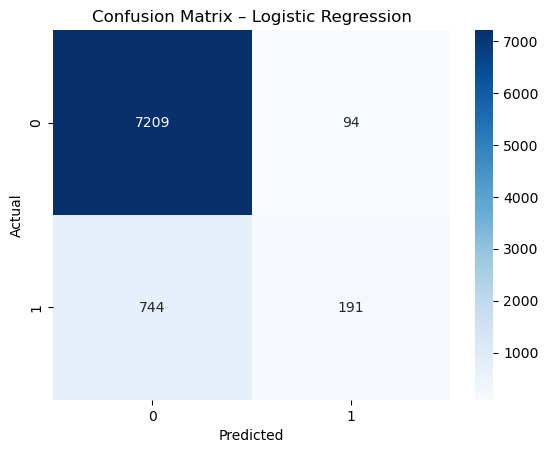

In [51]:
from sklearn.metrics import confusion_matrix

y_pred = best_lr.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues'
)
plt.title('Confusion Matrix – Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Observation** The model is effective at avoiding unnecessary marketing contacts but tends to miss many potential subscribers, indicating an opportunity to improve recall.

## Findings

Which customer attributes most influence whether a client subscribes to a term deposit ?

#### Extract Coefficients from the Logistic Regression Model

In [167]:
# Get feature names
feature_names = best_lr.named_steps['preprocessor'].get_feature_names_out()

# Extract coefficients
coefficients = best_lr.named_steps['classifier'].coef_[0]
coefficients

# Create Data Frame to easily map coefficients with their corresponding feature names
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', key=abs, ascending=False)

coef_df[:20]

,Feature,Coefficient
50,categorial_encoder__month_may,-0.547462
49,categorial_encoder__month_mar,0.500149
4,numeric_scaler__emp.var.rate,-0.455819
8,numeric_scaler__nr.employed,-0.365924
2,numeric_scaler__pdays,-0.275514
5,numeric_scaler__cons.price.idx,0.259742
59,categorial_encoder__poutcome_failure,-0.237211
42,categorial_encoder__contact_cellular,0.236834
43,categorial_encoder__contact_telephone,-0.235845
51,categorial_encoder__month_nov,-0.219012


#### Business Insights

* Campaign timing significantly impacts the success rate. Marketing efforts are more effective in the month of March and less effective in the months of May and November.
* Customers are less likely to commit term deposits during higher employment activity and higher interest rates, possibly due to alternate spend and invenstment channels.
* Customers are more likely to respond positively when communicated via mobile phones than landline phones. Marketing should aim to prioratize such contact methods.
* Repetitive contacts during the same campaign period are less effective.

##### Questions

N/A